In [33]:
# Necessary imports
import gc

import numpy as np
import tensorflow as tf

from sklearn.datasets.samples_generator import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


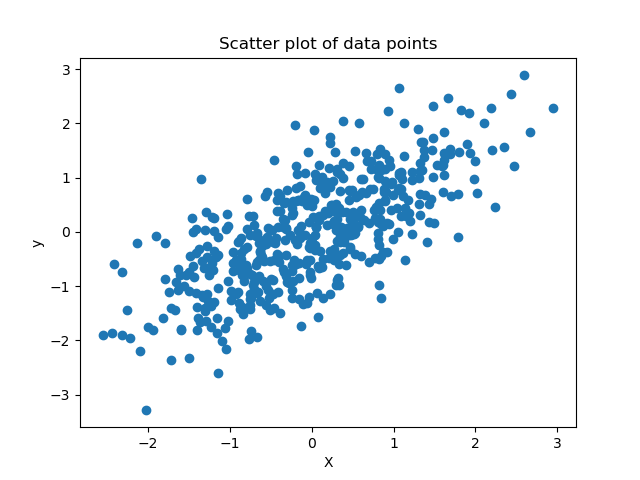

In [34]:
# Parameter
learning_rate = 0.01

# Make data for regression
def generate_dataset(n_train, n_test, n_features, noise=0.1, verbose=False):
    """Generate a regression dataset with the given parameters."""
    if verbose:
        print("generating dataset...")

    X, y, coef = make_regression(n_samples=n_train + n_test,
                                 n_features=n_features, noise=noise, coef=True)
    
    X += np.random.normal(0, 1, X.shape[0]).reshape([-1, 1])
    y += np.random.normal(0, 1, X.shape[0])
        
        
    random_seed = 13
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=n_train, test_size=n_test, random_state=random_seed)
    X_train, y_train = shuffle(X_train, y_train, random_state=random_seed)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
    y_test = y_scaler.transform(y_test[:, None])[:, 0]

    gc.collect()
    if verbose:
        print("ok")
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = generate_dataset(500, 50, 1)
X_train = np.reshape(X_train, [-1, 1])
y_train = np.reshape(y_train, [-1, 1])

plt.scatter(x=X_train, y=y_train)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of data points')
plt.show()

In [3]:
# Define placeholders for X and Y
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

# Variables for W and b
W = tf.get_variable(name='W', shape=[1, 1], initializer=tf.random_normal_initializer())
b = tf.get_variable(name='b', shape=[1], initializer=tf.random_normal_initializer())

In [16]:
# Make predictions
prediction = (X * W) + b
# Calculate error
error = tf.reduce_mean(tf.square(prediction - Y))
# Optimize error
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

In [19]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

total_error = []
with tf.Session() as sess:
    sess.run(init)
    # Train for 1000 epochs
    for epoch in range(50):        
        _, _error, _W, _b = sess.run([optimizer, error, W, b], feed_dict={Y: y_train, X: X_train})
        print("Epoch: {}, Error: {}, W: {}, b: {}".format(epoch, _error, _W, _b))
        total_error.append(_error)        

Epoch: 0, Error: 6.4042463302612305, W: [[1.1084908]], b: [-1.905572]
Epoch: 1, Error: 4.274634838104248, W: [[1.0298089]], b: [-1.5244576]
Epoch: 2, Error: 2.9116830825805664, W: [[0.9668634]], b: [-1.219566]
Epoch: 3, Error: 2.039393901824951, W: [[0.916507]], b: [-0.97565275]
Epoch: 4, Error: 1.4811292886734009, W: [[0.8762219]], b: [-0.78052217]
Epoch: 5, Error: 1.1238398551940918, W: [[0.8439938]], b: [-0.6244177]
Epoch: 6, Error: 0.8951745629310608, W: [[0.8182113]], b: [-0.49953416]
Epoch: 7, Error: 0.7488288283348083, W: [[0.7975853]], b: [-0.39962733]
Epoch: 8, Error: 0.6551675796508789, W: [[0.78108454]], b: [-0.31970185]
Epoch: 9, Error: 0.5952242612838745, W: [[0.7678839]], b: [-0.25576147]
Epoch: 10, Error: 0.5568607449531555, W: [[0.7573234]], b: [-0.20460919]
Epoch: 11, Error: 0.5323079824447632, W: [[0.74887496]], b: [-0.16368735]
Epoch: 12, Error: 0.5165942907333374, W: [[0.7421162]], b: [-0.13094987]
Epoch: 13, Error: 0.5065374374389648, W: [[0.73670924]], b: [-0.1047

Epoch: 208, Error: 0.48865872621536255, W: [[0.71508145]], b: [-1.632175e-08]
Epoch: 209, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.594922e-08]
Epoch: 210, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576692e-08]
Epoch: 211, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5204163e-08]
Epoch: 212, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.4831635e-08]
Epoch: 213, Error: 0.48865872621536255, W: [[0.71508145]], b: [-1.6321751e-08]
Epoch: 214, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5949222e-08]
Epoch: 215, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576694e-08]
Epoch: 216, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5204165e-08]
Epoch: 217, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.4831636e-08]
Epoch: 218, Error: 0.48865872621536255, W: [[0.71508145]], b: [-1.6321753e-08]
Epoch: 219, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5949224e-08]
Epoch: 220, Error: 0.48865875601768494, W: [[0.7150814

Epoch: 399, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5949288e-08]
Epoch: 400, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.557676e-08]
Epoch: 401, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.520423e-08]
Epoch: 402, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.4831702e-08]
Epoch: 403, Error: 0.48865872621536255, W: [[0.71508145]], b: [-1.6321819e-08]
Epoch: 404, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.594929e-08]
Epoch: 405, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576761e-08]
Epoch: 406, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5204233e-08]
Epoch: 407, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.4831704e-08]
Epoch: 408, Error: 0.48865872621536255, W: [[0.71508145]], b: [-1.632182e-08]
Epoch: 409, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5949292e-08]
Epoch: 410, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576763e-08]
Epoch: 411, Error: 0.48865875601768494, W: [[0.71508145]

Epoch: 605, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576832e-08]
Epoch: 606, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5204304e-08]
Epoch: 607, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.4831775e-08]
Epoch: 608, Error: 0.48865872621536255, W: [[0.71508145]], b: [-1.6321891e-08]
Epoch: 609, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5949363e-08]
Epoch: 610, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576834e-08]
Epoch: 611, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5204305e-08]
Epoch: 612, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.4831777e-08]
Epoch: 613, Error: 0.48865872621536255, W: [[0.71508145]], b: [-1.6321893e-08]
Epoch: 614, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5949364e-08]
Epoch: 615, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576836e-08]
Epoch: 616, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5204307e-08]
Epoch: 617, Error: 0.48865875601768494, W: [[0.71508

Epoch: 811, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5204376e-08]
Epoch: 812, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.4831848e-08]
Epoch: 813, Error: 0.48865872621536255, W: [[0.71508145]], b: [-1.6321964e-08]
Epoch: 814, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5949436e-08]
Epoch: 815, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576907e-08]
Epoch: 816, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5204378e-08]
Epoch: 817, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.48318495e-08]
Epoch: 818, Error: 0.48865872621536255, W: [[0.71508145]], b: [-1.6321966e-08]
Epoch: 819, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5949437e-08]
Epoch: 820, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576909e-08]
Epoch: 821, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.520438e-08]
Epoch: 822, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.4831851e-08]
Epoch: 823, Error: 0.48865872621536255, W: [[0.71508

Epoch: 980, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576965e-08]
Epoch: 981, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5204437e-08]
Epoch: 982, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.4831908e-08]
Epoch: 983, Error: 0.48865872621536255, W: [[0.71508145]], b: [-1.6322025e-08]
Epoch: 984, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5949496e-08]
Epoch: 985, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576967e-08]
Epoch: 986, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5204439e-08]
Epoch: 987, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.483191e-08]
Epoch: 988, Error: 0.48865872621536255, W: [[0.71508145]], b: [-1.6322026e-08]
Epoch: 989, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5949498e-08]
Epoch: 990, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.5576969e-08]
Epoch: 991, Error: 0.48865875601768494, W: [[0.71508145]], b: [-1.520444e-08]
Epoch: 992, Error: 0.48865875601768494, W: [[0.7150814

<IPython.core.display.Javascript object>


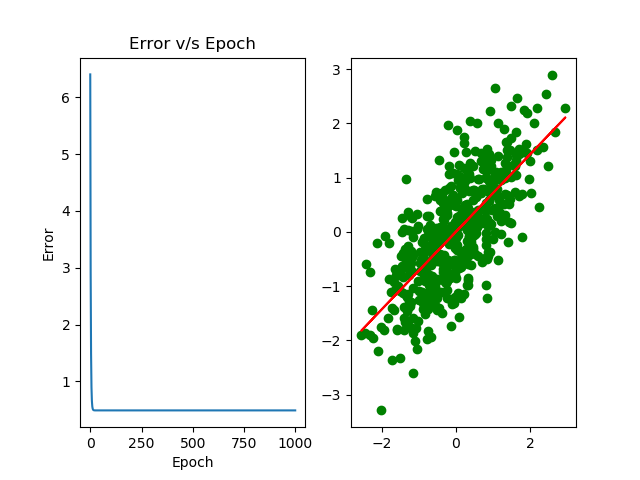

In [35]:
# Subplots or error and leanred regression line
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# Plot 1
ax1.plot(total_error)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Error')
ax1.set_title('Error v/s Epoch')
# Plot 2
ax2.scatter(x=X_train, y=y_train, color='g')
ax2.plot(X_train, X_train * _W + _b, color='r')
plt.show()